## Porfolio diversified strategy

## 1.Library Imports

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [9]:
plt.style.use('ggplot')

## 2. Select 20 Random Stocks

In [2]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')

symbol = sp500['Symbol'].unique().tolist()
symbol.sort()
symbol

['A',
 'AAL',
 'AAPL',
 'ABBV',
 'ABNB',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF-B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLDR',
 'BLK',
 'BMY',
 'BR',
 'BRK-B',
 'BRO',
 'BSX',
 'BWA',
 'BX',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COR',
 'COST',
 'CPAY',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTL

In [3]:
tickers = random.sample(symbol, 20) 
data = yf.download(tickers=tickers, start='2010-01-01').stack()
data

[*********************100%%**********************]  20 of 20 completed


Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2010-01-04 ALL      21.826736   30.410000   30.510000   30.090000   30.360001   
           AON      32.445770   37.939999   38.500000   37.810001   38.450001   
           BSX       9.010000    9.010000    9.130000    8.780000    8.860000   
           CHRW     42.295486   59.340000   59.650002   58.939999   59.220001   
           EIX      21.003613   34.770000   35.130001   34.700001   35.070000   
...                       ...         ...         ...         ...         ...   
2024-06-18 QCOM    227.089996  227.089996  230.630005  226.000000  226.820007   
           UNH     481.049988  481.049988  491.660004  479.040009  490.709991   
           WDC      80.230003   80.230003   81.550003   79.629997   80.370003   
           WEC      78.050003   78.050003   78.580002   77.650002   78.110001   
           WELL    103.940002  103.940002  104.260002  102.949997  103.809998   

Price                  Volume  
Date       Ticker              
2010-01-04 ALL      2631000.0  
           AON      3407100.0  
           BSX     14332300.0  
           CHRW      822900.0  
           EIX      1931500.0  
...                       ...  
2024-06-18 QCOM    22024700.0  
           UNH      3690100.0  
           WDC      5462200.0  
           WEC      1546300.0  
           WELL     2172600.0  

[69854 rows x 6 columns]

In [4]:
close = data.unstack(level=1).loc[:,'Adj Close'].dropna()
close

Ticker,ALL,AON,BSX,CHRW,EIX,EXC,EXPE,F,GM,HII,HWM,LH,LYB,META,NDSN,QCOM,UNH,WDC,WEC,WELL
Date,,,,,,,,,,,,,,,,,,,,
2016-11-01,56.335278,101.384407,21.709999,56.607403,53.599472,18.314999,121.469521,8.030534,26.680285,139.656448,18.157825,103.383736,51.890720,129.234436,90.347626,54.741146,124.250679,50.919605,46.156574,49.401173
2016-11-02,56.444252,100.201073,21.600000,56.640507,52.268719,18.006626,118.586807,7.885276,26.654865,138.273438,17.217306,103.542366,51.346687,126.909203,89.846848,53.739876,123.849724,49.104855,45.730659,49.254616
2016-11-03,57.072884,101.076935,21.540001,57.037643,52.527473,18.050676,120.794640,7.850693,26.332800,128.566544,16.785427,101.546989,51.957069,119.753914,89.911789,53.627731,122.824890,49.051472,45.935730,48.353218
2016-11-04,55.924568,100.434036,21.559999,56.830803,51.980392,18.001120,120.717506,7.843776,26.409075,126.846436,16.967781,101.764053,52.049961,120.502373,89.420319,53.451523,122.717949,48.944736,45.525589,48.368057
2016-11-07,56.041927,103.788353,22.040001,58.295208,52.911922,18.403103,121.951591,8.009780,27.137951,128.739380,16.641474,104.477440,52.521038,121.899506,92.090927,54.837269,126.478523,51.302124,46.203896,49.184822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,160.630005,294.980011,77.410004,84.790001,73.550003,34.750000,124.559998,12.080000,48.860001,243.289993,83.430000,196.360001,95.910004,508.335297,232.729996,215.389999,490.987091,79.190002,79.309998,102.870003
2024-06-13,160.830002,295.420013,76.959999,84.519997,73.449997,35.410000,123.419998,11.940000,47.650002,240.259995,82.800003,196.479996,95.559998,503.600006,233.669998,217.809998,495.199219,79.580002,78.540001,103.870003
2024-06-14,157.070007,295.390015,76.760002,83.599998,73.209999,35.540001,124.610001,11.710000,46.770000,238.460007,78.940002,199.880005,93.540001,504.160004,228.720001,215.330002,495.019989,78.120003,78.860001,104.040001


## 3. Calculate Daily Returns

In [5]:
pct_returns = close.pct_change(periods=1).dropna()
pct_returns

Ticker,ALL,AON,BSX,CHRW,EIX,EXC,EXPE,F,GM,HII,HWM,LH,LYB,META,NDSN,QCOM,UNH,WDC,WEC,WELL
Date,,,,,,,,,,,,,,,,,,,,
2016-11-02,0.001934,-0.011672,-0.005067,0.000585,-0.024828,-0.016837,-0.023732,-0.018088,-0.000953,-0.009903,-0.051797,0.001534,-0.010484,-0.017992,-0.005543,-0.018291,-0.003227,-0.035640,-0.009228,-0.002967
2016-11-03,0.011137,0.008741,-0.002778,0.007012,0.004950,0.002446,0.018618,-0.004386,-0.012083,-0.070201,-0.025084,-0.019271,0.011887,-0.056381,0.000723,-0.002087,-0.008275,-0.001087,0.004484,-0.018301
2016-11-04,-0.020120,-0.006360,0.000928,-0.003626,-0.010415,-0.002745,-0.000639,-0.000881,0.002897,-0.013379,0.010864,0.002138,0.001788,0.006250,-0.005466,-0.003286,-0.000871,-0.002176,-0.008929,0.000307
2016-11-07,0.002099,0.033398,0.022264,0.025768,0.017921,0.022331,0.010223,0.021164,0.027599,0.014923,-0.019231,0.026664,0.009050,0.011594,0.029866,0.025925,0.030644,0.048164,0.014899,0.016886
2016-11-08,0.010769,0.006823,0.009528,0.000426,0.009641,0.007182,0.004111,-0.008635,-0.009057,0.009937,0.009275,0.007352,-0.002653,0.016946,0.005740,-0.002775,0.006835,-0.007110,0.007340,-0.019172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,-0.006002,0.004358,0.003370,0.004026,-0.000815,-0.040320,0.014415,-0.002477,0.013483,-0.005152,0.003006,-0.005369,-0.004360,0.002700,0.031148,0.032946,-0.006348,0.034893,-0.005517,-0.005703
2024-06-13,0.001245,0.001492,-0.005813,-0.003184,-0.001360,0.018993,-0.009152,-0.011589,-0.024765,-0.012454,-0.007551,0.000611,-0.003649,-0.009315,0.004039,0.011235,0.008579,0.004925,-0.009709,0.009721
2024-06-14,-0.023379,-0.000102,-0.002599,-0.010885,-0.003267,0.003671,0.009642,-0.019263,-0.018468,-0.007492,-0.046618,0.017305,-0.021139,0.001112,-0.021184,-0.011386,-0.000362,-0.018346,0.004074,0.001637


## 4. Calculate Annual Return and Risk

In [7]:
summary = pct_returns.describe().T.loc[:, ['std', 'mean']]
summary['mean'] = summary['mean']*252
summary['std'] = summary['std']*np.sqrt(252)
summary.rename(columns={'mean':'Annual Return', 'std':'Annual Risk'}, inplace=True)
summary['Risk/Return'] = summary['Annual Risk'].div(summary['Annual Return'])
summary

,Annual Risk,Annual Return,Risk/Return
Ticker,,,
ALL,0.254435,0.169909,1.497481
AON,0.238706,0.170188,1.402599
BSX,0.269689,0.201794,1.336458
CHRW,0.270103,0.091261,2.959670
EIX,0.283456,0.078328,3.618852
EXC,0.253224,0.116730,2.169325
EXPE,0.441300,0.102292,4.314119
F,0.379378,0.121924,3.111597
GM,0.377212,0.146664,2.571940


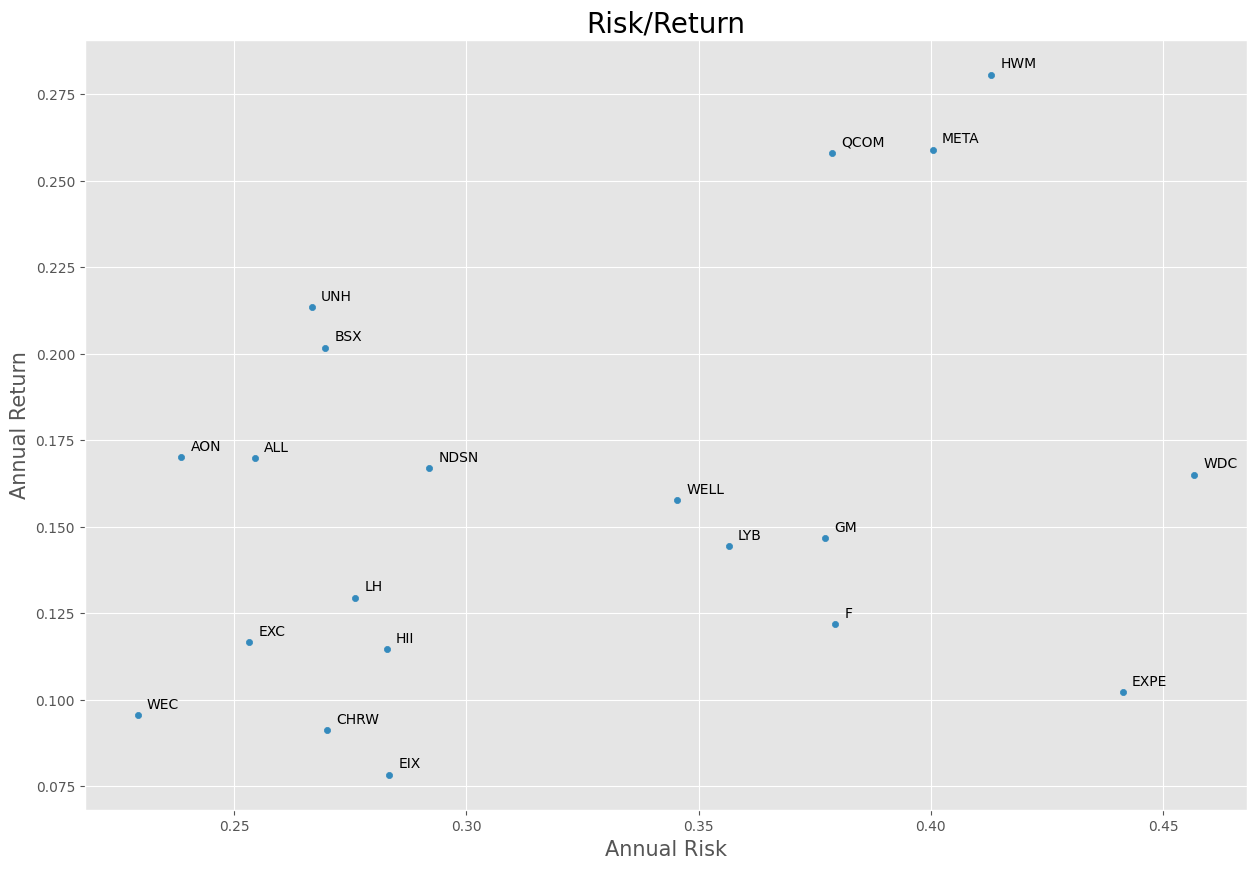

In [11]:
summary.plot.scatter(x='Annual Risk', y='Annual Return', figsize=(15,10), fontsize=10)

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,'Annual Risk']+0.002,  summary.loc[i, 'Annual Return']+0.002), fontsize=10)

plt.xlabel(xlabel='Annual Risk', fontsize=15)
plt.ylabel(ylabel='Annual Return', fontsize=15)
plt.title("Risk/Return", fontsize=20)
plt.show()

In [34]:
summary.sort_values(by='Risk/Return', axis=0, ascending=True, inplace=True)
summary

,Annual Risk,Annual Return,Risk/Return
Ticker,,,
UNH,0.266722,0.213547,1.249005
BSX,0.269689,0.201794,1.336458
AON,0.238706,0.170188,1.402599
QCOM,0.378802,0.258152,1.467360
HWM,0.412903,0.280658,1.471198
ALL,0.254435,0.169909,1.497481
META,0.400354,0.258993,1.545814
NDSN,0.292033,0.166901,1.749736
LH,0.276132,0.129490,2.132463


## 5. Diversify Portfolio

In Pandas, `cov` and `corr` are functions used to calculate the covariance and correlation, respectively, between columns of a DataFrame. When applied to stock closing prices, they provide insights into how the stock prices move relative to each other.

### Covariance (`cov`)

#### Definition:
Covariance is a measure of how two variables change together. It indicates the direction of the linear relationship between variables.

#### Interpretation:
- **Positive Covariance**: Indicates that the two variables tend to increase or decrease together.
- **Negative Covariance**: Indicates that one variable tends to increase when the other decreases.
- **Zero Covariance**: Indicates no linear relationship between the variables.

#### Calculation:
For two stocks, A and B:
$$ \text{Cov}(A, B) = \frac{1}{n-1} \sum_{i=1}^{n} (A_i - \bar{A})(B_i - \bar{B}) $$
where \( n \) is the number of data points, \( A_i \) and \( B_i \) are the closing prices of stocks A and B at time \( i \), and \( \bar{A} \) and \( \bar{B} \) are the mean closing prices of stocks A and B.



### Correlation (`corr`)

#### Definition:
Correlation is a standardized measure of the relationship between two variables. It indicates both the strength and direction of the linear relationship.

#### Interpretation:
- **Correlation Coefficient (r)**: Ranges from -1 to 1.
  - **r = 1**: Perfect positive linear relationship.
  - **r = -1**: Perfect negative linear relationship.
  - **r = 0**: No linear relationship.

#### Calculation:
For two stocks, A and B:
$$ \text{Corr}(A, B) = \frac{\text{Cov}(A, B)}{\sigma_A \sigma_B} $$

### Practical Meaning in Stock Analysis:

- **Covariance**: Provides the direction of the relationship but not the strength. For instance, if the covariance between AAPL and MSFT is positive, it means that when AAPL's closing price increases, MSFT's closing price also tends to increase (and vice versa).

- **Correlation**: Provides both direction and strength of the relationship. A high positive correlation (close to 1) indicates that the stock prices move together strongly in the same direction, while a high negative correlation (close to -1) indicates that they move strongly in opposite directions.


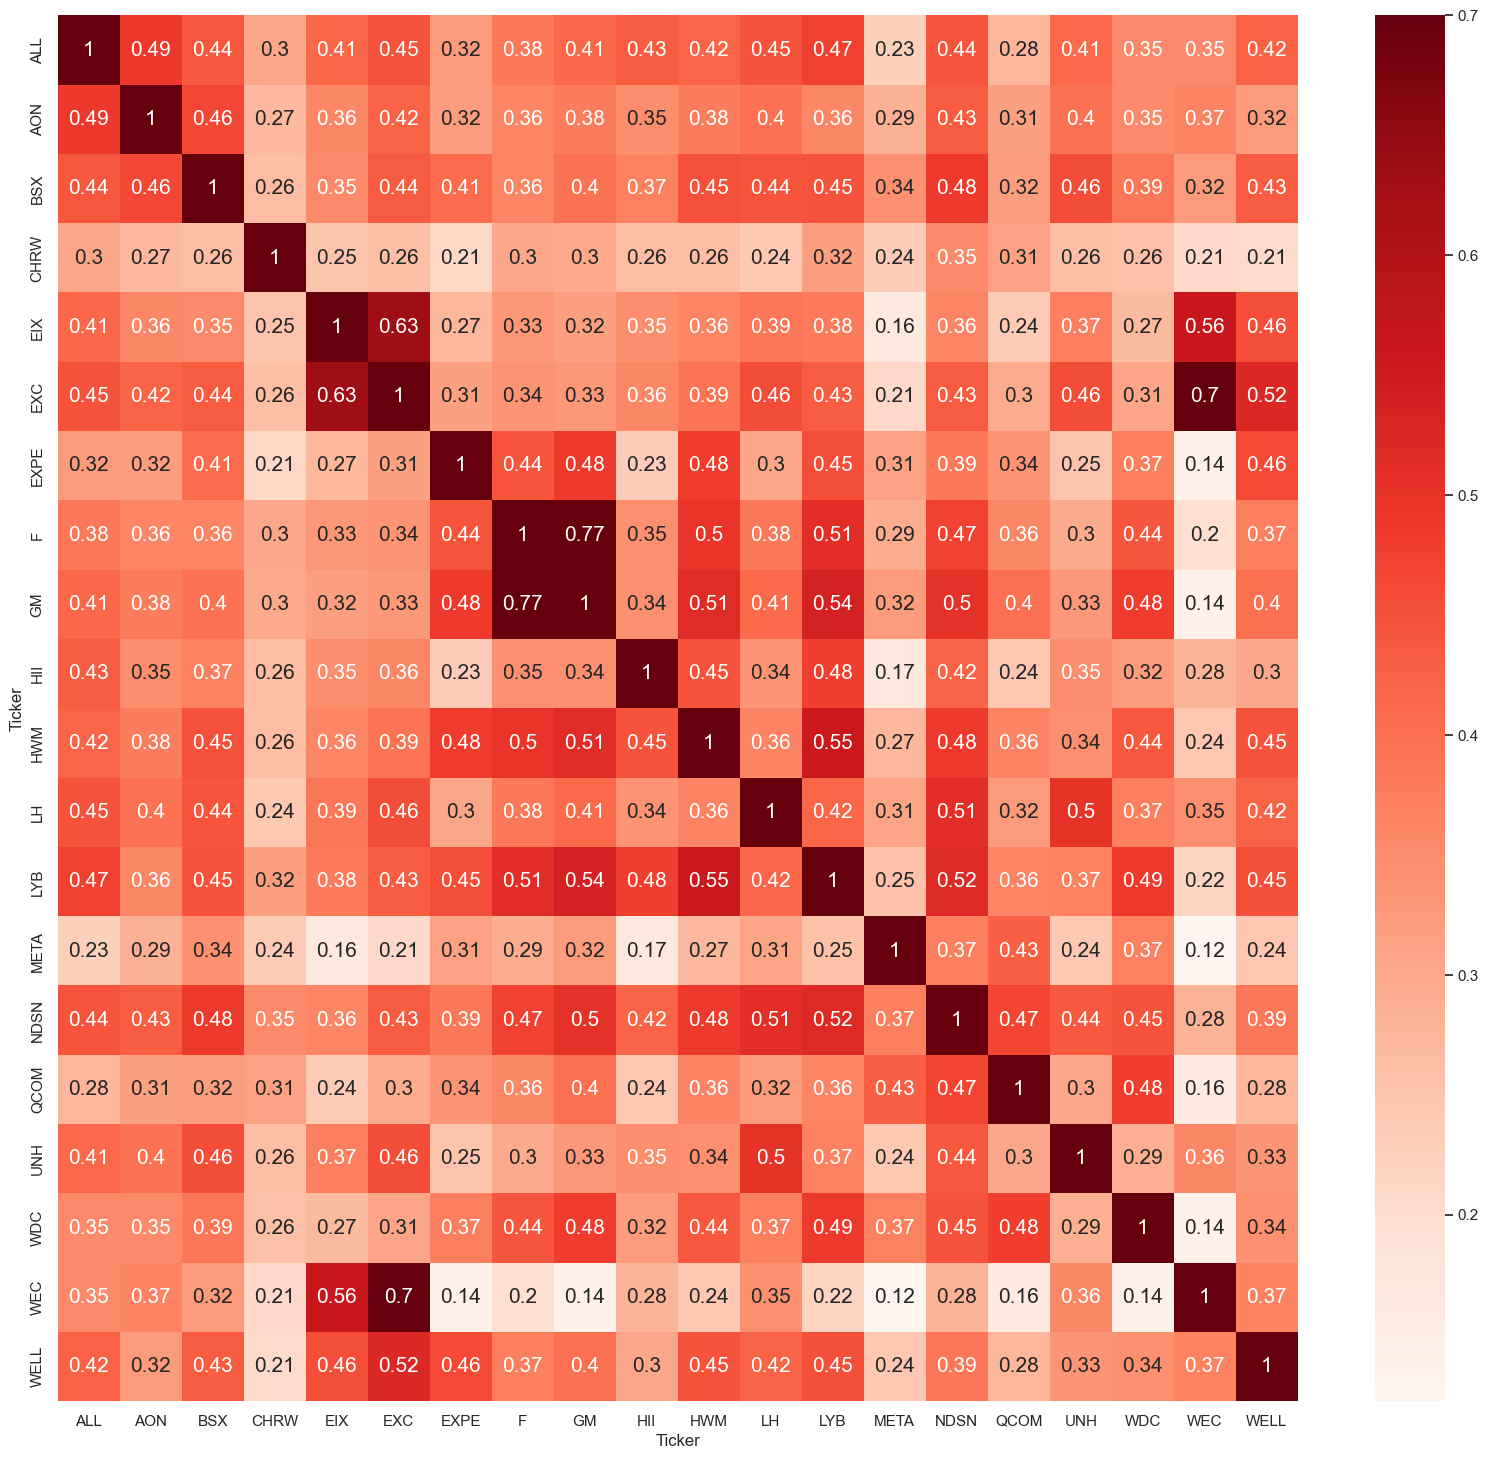

In [33]:
corr = pct_returns.corr()
plt.figure(figsize=(20,18))
sns.set(font_scale=1)
sns.heatmap(data=corr, cmap="Reds", annot=True, annot_kws={"size":15}, vmax=0.7)
plt.show()

## 6. Select 5 Best perfoming and diverse stocks

In [43]:
portfolio = []

correlation_thresold = 0.4

for stock in summary.index:
    if len(portfolio) == 5:
        break

    unrelated = True

    for selected_stocks in portfolio:
        if abs(corr.at[selected_stocks,stock]) > correlation_thresold:
            unrelated = False

    if unrelated: portfolio.append(stock)

portfolio

['UNH', 'AON', 'QCOM', 'HWM', 'WEC']

## 7. For selected stocks draw SMA100 and SMA200 plot

### Simple Moving Average (SMA) and Exponential Moving Average (EMA)

#### Simple Moving Average (SMA)

The Simple Moving Average (SMA) is calculated by taking the average of a specific number of closing prices over a given period. It is a straightforward indicator that smoothens price data by averaging it over a specific time period.

**Calculation**:
$$ \text{SMA} = \frac{\sum{P_t}}{n} $$
where  $P_{t}$ is the price at time  `t` and  `n` is the number of periods.

**Example**:
To calculate a 5-day SMA:
$$ \text{SMA} = \frac{P_1 + P_2 + P_3 + P_4 + P_5}{5} $$

**Advantages**:
- Easy to calculate and understand.
- Provides a clear indication of the average price over a period.

**Disadvantages**:
- Gives equal weight to all periods, which can be a drawback as it may react slower to recent price changes.

#### Exponential Moving Average (EMA)

The Exponential Moving Average (EMA) gives more weight to recent prices, making it more responsive to new information. It uses a smoothing factor to apply more significance to the latest prices.

**Calculation**:
$$ \text{EMA} = P_t \cdot \left(\frac{2}{n+1}\right) + EMA_{y} \cdot \left(1 - \frac{2}{n+1}\right) $$
where $P_{t}$ is the current price, $EMA_{y}$ is the previous period's EMA, and `n` is the number of periods.

**Advantages**:
- Reacts more quickly to recent price changes, which can be beneficial for short-term trading.
- More sensitive to new information, helping traders to catch trends earlier.

**Disadvantages**:
- Can be more volatile and may give false signals due to its sensitivity.

### Which is Better?

The choice between SMA and EMA depends on the trading strategy and goals:

1. **SMA**:
   - **Long-term Trading**: Preferred by long-term traders and investors for its simplicity and smoother lines.
   - **Less Sensitive**: Better for filtering out noise and identifying the overall trend.

2. **EMA**:
   - **Short-term Trading**: Preferred by short-term traders and those looking to capture quick movements in the market.
   - **More Sensitive**: Better for identifying short-term trends and getting earlier signals.

### Summary

- **SMA**: Better for long-term trends and smoothing out noise. Simpler and less responsive to recent price changes.
- **EMA**: Better for short-term trading and capturing recent price movements. More responsive to recent price changes, which can be both an advantage and a disadvantage.

In [85]:
class SMABackTest():
    def __init__(self, symbol, start, end, sma_s, sma_l):
        plt.style.use('ggplot')
        self.symbol = symbol
        self.start = start
        self.end = end
        self.sma_s = sma_s
        self.sma_l = sma_l
        self.stock = self.get_data()
        self.description = {
            'Returns' : self.stock['Returns Buy and Hold'].iloc[-1],
            'Strategy Return' : self.stock['Strategy Return'].iloc[-1],
            'Max Drowdown' : self.stock['Drowdown'].max(),
            'Max Drowdown Index' : self.stock['Drowdown'].idxmax(),
            'Max Drowdown PCT' : self.stock['Drowdown PCT'].max(),
            'Max Drowdown PCT Index' : self.stock['Drowdown PCT'].idxmax(),
        }

    def get_data(self):
        data = yf.download(tickers=self.symbol, start=self.start, end=self.end)

        data[f'SMA{self.sma_s}'] = data.Close.rolling(window=self.sma_s, min_periods=self.sma_s).mean()
        data[f'SMA{self.sma_l}'] = data.Close.rolling(window=self.sma_l, min_periods=self.sma_l).mean()

        data.dropna(inplace=True)
        data['Daily Returns'] = np.log(data.Close.div(data.Close.shift(1)))
        data.dropna(inplace=True)

        data['Returns Buy and Hold'] = data['Daily Returns'].cumsum().apply(np.exp)
        data['Cumulative Max'] = data['Returns Buy and Hold'].cummax()
        data['Drowdown'] = data['Returns Buy and Hold'] - data['Cumulative Max']
        data['Drowdown PCT'] = data['Drowdown'].div(data['Cumulative Max'])

        data['Position'] = np.where(data[f'SMA{self.sma_s}'] > data[f'SMA{self.sma_l}'], 1, -1)
        data['Strategy'] = data['Daily Returns'] * data['Position'].shift(1)
        data['Strategy Return'] = data['Strategy'].cumsum().apply(np.exp)
        

        return data

    def visualize_sma_data(self):
        self.stock[['Close',f'SMA{self.sma_s}', f'SMA{self.sma_l}']].plot(figsize=(12,10), fontsize=12)
        plt.legend(loc='upper left', fontsize=13)
        plt.title(label=f'{self.symbol} Price | SMA{self.sma_s} | SMA{self.sma_l}', fontsize=18)
        plt.xlabel(xlabel='Time Period', fontsize=13)
        plt.ylabel(ylabel='Price in Dollor', fontsize=13)
        plt.show()

    def visualize_returns(self):
        self.stock[['Cumulative Max', 'Returns Buy and Hold']].plot(figsize=(12,10), fontsize=12)
        plt.legend(loc='upper left', fontsize=13)
        plt.title(label=f'{self.symbol} Drowdowns', fontsize=18)
        plt.xlabel(xlabel='Time Period', fontsize=13)
        plt.ylabel(ylabel='Price in Dollor', fontsize=13)
        plt.show()

    def compare_strategy(self):        
        self.stock[['Strategy Return', 'Returns Buy and Hold']].plot(figsize=(12,10), fontsize=12)
        plt.legend(loc='upper left', fontsize=13)
        plt.title(label=f'{self.symbol} Buy and Hold vs Strategy Return', fontsize=18)
        plt.xlabel(xlabel='Time Period', fontsize=13)
        plt.ylabel(ylabel='Price in Dollor', fontsize=13)
        plt.show()

In [91]:
UNH = SMABackTest(symbol='UNH', start='2010-01-01', end='2024-06-19', sma_s=50, sma_l=100)

[*********************100%%**********************]  1 of 1 completed


In [92]:
UNH.description

{'Returns': 16.708925755313903,
 'Strategy Return': 1.6730387519887573,
 'Max Drowdown': 0.0,
 'Max Drowdown Index': Timestamp('2010-05-27 00:00:00'),
 'Max Drowdown PCT': 0.0,
 'Max Drowdown PCT Index': Timestamp('2010-05-27 00:00:00')}

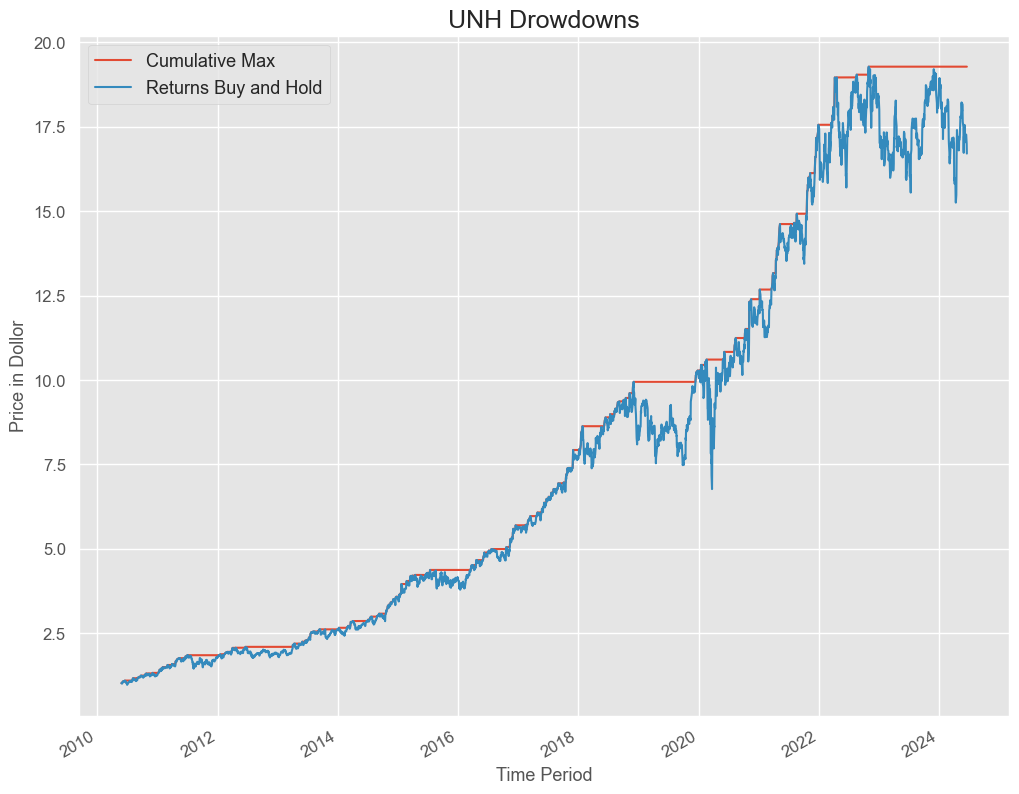

In [93]:
UNH.visualize_returns()

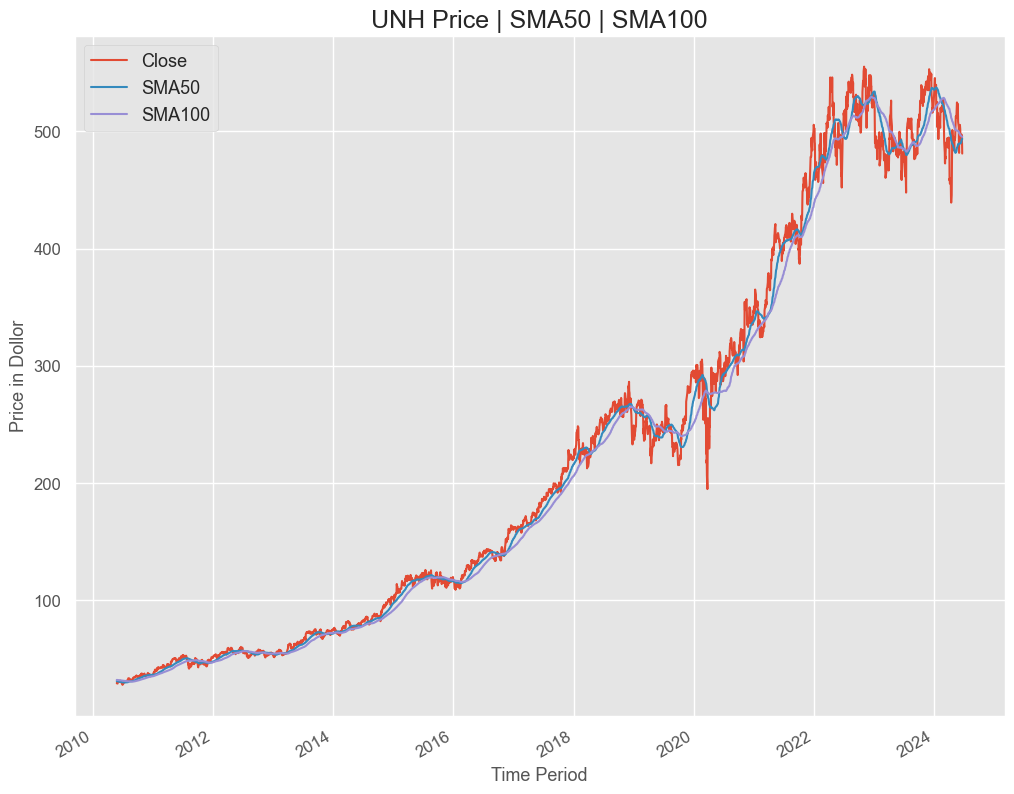

In [94]:
UNH.visualize_sma_data()

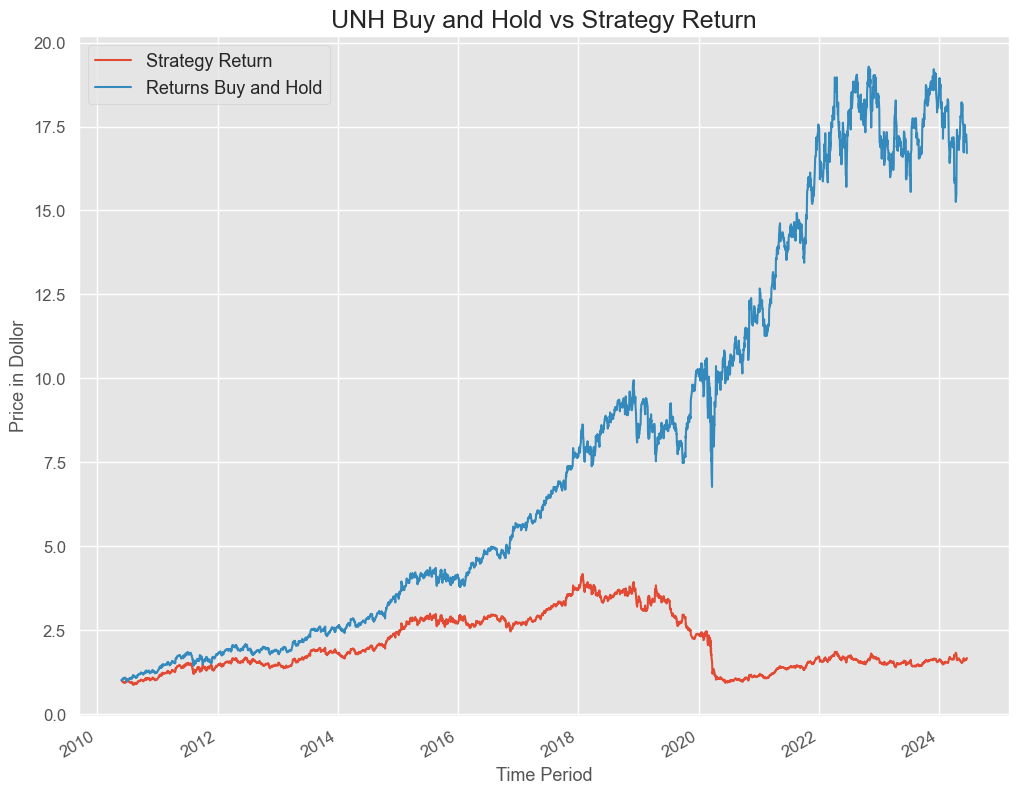

In [95]:
UNH.compare_strategy()

In [96]:
AON = SMABackTest(symbol='AON', start='2010-01-01', end='2024-06-19', sma_s=50, sma_l=200)

[*********************100%%**********************]  1 of 1 completed


In [97]:
AON.description

{'Returns': 7.43631351628005,
 'Strategy Return': 1.5928270036771064,
 'Max Drowdown': 0.0,
 'Max Drowdown Index': Timestamp('2010-10-19 00:00:00'),
 'Max Drowdown PCT': 0.0,
 'Max Drowdown PCT Index': Timestamp('2010-10-19 00:00:00')}

In [102]:
QCOM = SMABackTest(symbol='QCOM', start='2010-01-01', end='2024-06-19', sma_s=50, sma_l=200)
HWM = SMABackTest(symbol='HWM', start='2010-01-01', end='2024-06-19', sma_s=50, sma_l=200)
WEC = SMABackTest(symbol='WEC', start='2010-01-01', end='2024-06-19', sma_s=50, sma_l=200)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [103]:
QCOM.description

{'Returns': 5.104292824691024,
 'Strategy Return': 0.13943844405337893,
 'Max Drowdown': 0.0,
 'Max Drowdown Index': Timestamp('2010-10-19 00:00:00'),
 'Max Drowdown PCT': 0.0,
 'Max Drowdown PCT Index': Timestamp('2010-10-19 00:00:00')}

In [100]:
HWM.description

{'Returns': 3.303129929166517,
 'Strategy Return': 0.6254631673045088,
 'Max Drowdown': 0.0,
 'Max Drowdown Index': Timestamp('2017-08-18 00:00:00'),
 'Max Drowdown PCT': 0.0,
 'Max Drowdown PCT Index': Timestamp('2017-08-18 00:00:00')}

In [101]:
WEC.description

{'Returns': 2.6579262271448716,
 'Strategy Return': 0.654781621558014,
 'Max Drowdown': 0.0,
 'Max Drowdown Index': Timestamp('2010-10-19 00:00:00'),
 'Max Drowdown PCT': 0.0,
 'Max Drowdown PCT Index': Timestamp('2010-10-19 00:00:00')}

## Based on Returns I would chose following stocks out 5 

- UNH
- AON
- QCOM
